### CHALLENGE_02

Build a movie recommender system using a Python library such as Surprise or FastFM.

GroupLens Research has collected and made available rating data sets from the MovieLens web site [http://movielens.org](http://movielens.org).

#### MovieLens 25M Dataset

MovieLens 20M movie ratings. Stable benchmark dataset. 20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users. Includes tag genome data with 15 million relevance scores across 1,129 tags. 

Released 12/2019

[README.txt](http://files.grouplens.org/datasets/movielens/ml-25m-README.html)

[ml-25m.zip](http://files.grouplens.org/datasets/movielens/ml-25m.zip) (size: 250 MB, [checksum](http://files.grouplens.org/datasets/movielens/ml-25m.zip.md5))

Permalink: [https://grouplens.org/datasets/movielens/25m/](https://grouplens.org/datasets/movielens/25m/)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from surprise import (Reader, Dataset, accuracy,
                      NormalPredictor, BaselineOnly,
                      SVD, SVDpp, NMF,
                      KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, 
                      SlopeOne,
                      CoClustering)
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [3]:
# Load Dataset
ratings = pd.read_csv("../../Downloads/Data/challenge/ml-25m/ratings.csv")
ratings.sample(2)

,userId,movieId,rating,timestamp
17081099,110786,353,3.0,842812627
5306368,34415,27808,3.0,1152992052


In [4]:
# Check Datatypes
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [5]:
# Range of ratings
ratings["rating"].min(), ratings["rating"].max()

(0.5, 5.0)

In [6]:
# Check Missing Values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

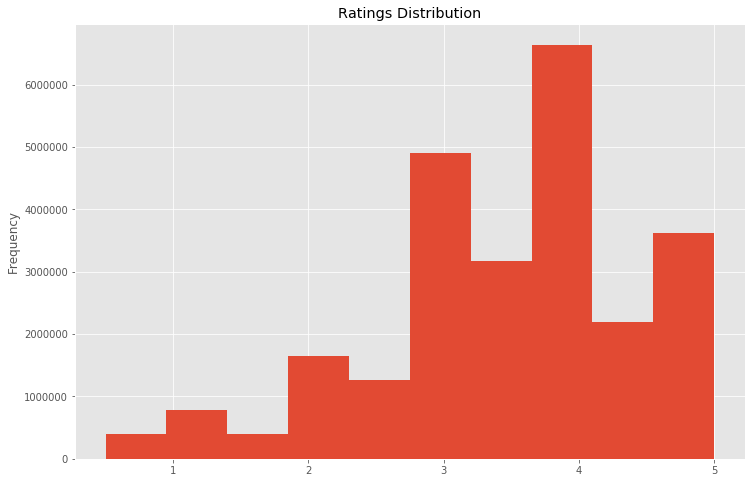

In [7]:
# Distribution of Ratings
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(ratings["rating"])
ax.set_ylabel("Frequency")
ax.set_title("Ratings Distribution")
plt.savefig("images/ratings_distribution.svg")

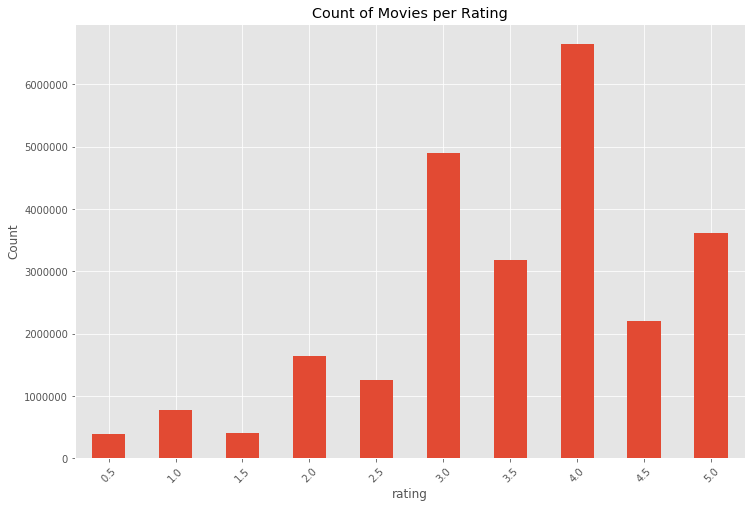

In [8]:
# Count of Movies per Rating
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["rating"])["rating"].count().plot(kind="bar", rot=45, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Count of Movies per Rating")
plt.savefig("images/Count_Movies_per_Rating.svg")

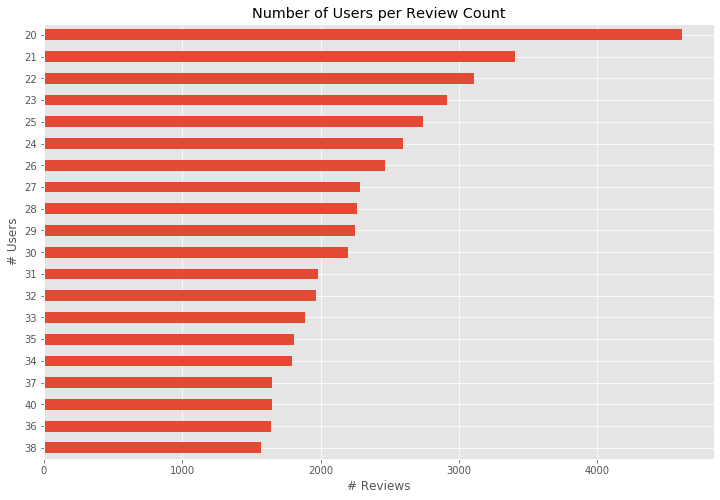

In [9]:
# Number of Users per Review Count
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["userId"])["rating"].count().value_counts().sort_values(ascending=True)[-20:].plot(kind="barh", ax=ax, rot=0)
ax.set_xlabel("# Reviews")
ax.set_ylabel("# Users")
ax.set_title("Number of Users per Review Count")
plt.savefig("images/Number_of_User_per_Review_Count.svg")

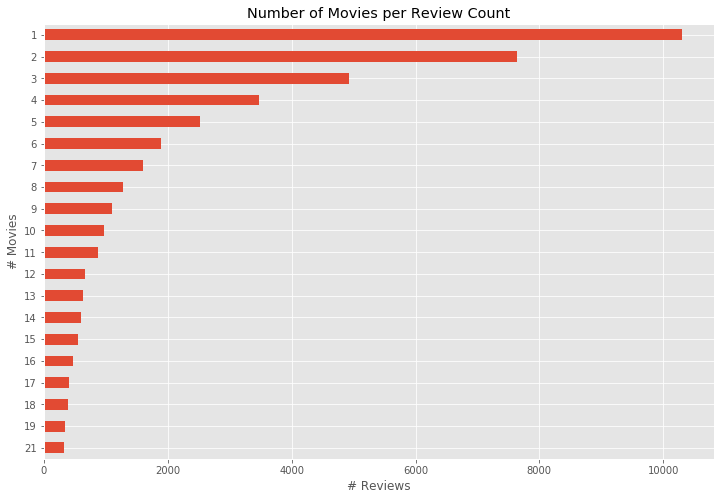

In [10]:
# Number of Movies per Review Count
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["movieId"])["rating"].count().value_counts().sort_values(ascending=True)[-20:].plot(kind="barh", ax=ax, rot=0)
ax.set_xlabel("# Reviews")
ax.set_ylabel("# Movies")
ax.set_title("Number of Movies per Review Count")
plt.savefig("images/Number_of_Movies_per_Review_Count.svg")

In [11]:
# Instiate Reader Object
reader = Reader(rating_scale=(0.5, 5))

In [12]:
# Load Dataset to Surprise
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [13]:
# Grid Search Cross Validation
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

model = BaselineOnly(bsl_options=bsl_options)
cross_validate(model, data, measures=['RMSE'], cv=3, verbose=2)

Estimating biases using als...


KeyboardInterrupt: 

In [14]:
# Train and Test set split
train, test = train_test_split(data, test_size=0.25)
train.shape, test.shape

AttributeError: 'Trainset' object has no attribute 'shape'

In [ ]:
# Instantiate Best Model
model = BaselineOnly(bsl_options=bsl_options)

In [ ]:
# Make Predictions
pred = algo.fit(train).test(test)

In [ ]:
# Check Accuracy
accuracy.rmse(pred)